In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import graphviz
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

ds_hmeq = pd.read_csv("./csvfiles/HMEQ.csv")

ds_hmeq.isnull().sum()

ds_hmeq["JOB"].fillna("Other", inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(), inplace = True)

ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

np.random.seed(seed = 1234)
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
ds_hmeq_test = ds_hmeq_dummy[~msk]

ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1)

print("train data X size:", ds_hmeq_train_x.shape)
print("train data y size:", ds_hmeq_train_y.shape)
print("test data X size:", ds_hmeq_test_x.shape)
print("test data y size:", ds_hmeq_test_y.shape)



train data X size: (2604, 18)
train data y size: (2604,)
test data X size: (1144, 18)
test data y size: (1144,)


In [4]:
gbm = GradientBoostingClassifier(random_state=1234)
gbm.fit(ds_hmeq_train_x, ds_hmeq_train_y)

# 훈련 데이터 정확도
print("Accuray on training set:{:.3f}".format(gbm.score(ds_hmeq_train_x, ds_hmeq_train_y)))

# test 데이터 정확도
print("Accuray on test set:{:.3f}".format(gbm.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accuray on training set:0.959
Accuray on test set:0.944


In [8]:
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# 0.01부터 1까지 0.05 단위로 학습률 조정

for i in range(1, 100, 5):
    gb1 = GradientBoostingClassifier(learning_rate=i/100, random_state=1234)
    gb1.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(gb1.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(gb1.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["LearningRate"] = [i/100 for i in range(1, 100, 5)]
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)


,LearningRate,TrainAccuracy,TestAccuracy
0,0.01,0.931,0.934
1,0.06,0.952,0.941
2,0.11,0.964,0.943
3,0.16,0.974,0.943
4,0.21,0.982,0.943
5,0.26,0.990,0.941
6,0.31,0.992,0.941
7,0.36,0.997,0.944
8,0.41,0.998,0.942
9,0.46,0.999,0.941


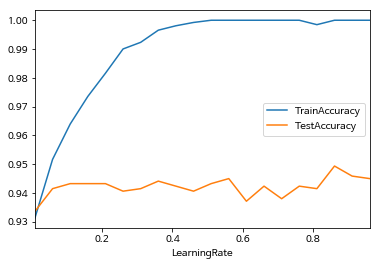

In [9]:
ds_accuracy1.set_index("LearningRate").plot.line()

In [15]:
# 트리수 : 50~150까지 10단위로 증가 및 학습률 : 0.2로 고정
para_estimators = [estimators for estimators in range(50,150,10)]
lr = 0.2
#train 및 test정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# 트리 개수 (1~30) GBM 모델 생성 및 정확도 값 저장
for i in para_estimators:
    gb2 = GradientBoostingClassifier(learning_rate=0.2, random_state=1234,
                                     n_estimators=i)
    gb2.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(gb2.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(gb2.score(ds_hmeq_test_x, ds_hmeq_test_y))
    
#저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성

ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Estimators"] = para_estimators
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)


,Estimators,TrainAccuracy,TestAccuracy
0,50,0.966,0.947
1,60,0.971,0.945
2,70,0.973,0.942
3,80,0.977,0.941
4,90,0.980,0.942
5,100,0.983,0.941
6,110,0.983,0.942
7,120,0.985,0.942
8,130,0.988,0.941
9,140,0.989,0.942


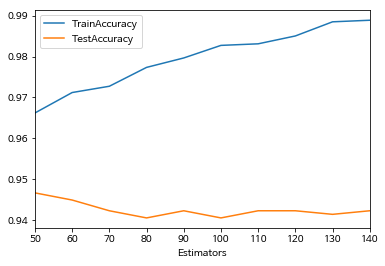

In [16]:
ds_accuracy2.set_index("Estimators").plot.line()